### BADASS Analysis - can we tell the difference between amino acids, sugars, lipids and nucleobases?

In [1]:
from subroutines.parse_array_data import ParseArrayData
from subroutines.train import RunML

In [2]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import OrderedDict
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

#### Parse in input data

Fatty acids data (excluding farnesol (F) and geraniol (G))

In [3]:
fa_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/FAs/Reformatted_FA_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8'],
    peptide_list=['No Pep', 'GRP22', 'GRP35', 'GRP46', 'GRP51', 'GRP52', 'GRP63', 'GRP80', 'Pent', 'Hex', 'Hex2',
                  'Hept', '24D', '24E', '24K', '17K'],
    results_dir='Analysis/Standard_array/All_small_molecules/FA_results/',
    control_peptides=['GRP35'],
    control_analytes=['F', 'G']
)

Directory Analysis/Standard_array/All_small_molecules/FA_results/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Analysis/Standard_array/All_small_molecules/FA_results/?y


Amino acids data

In [4]:
aa_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10', 'repeat_11', 'repeat_12', 'repeat_13', 'repeat_14', 'repeat_15',
                  'repeat_16', 'repeat_17', 'repeat_18', 'repeat_19', 'repeat_20'],
    peptide_list=['No Pep', 'GRP22', 'GRP35', 'GRP46', 'GRP51', 'GRP52', 'GRP63', 'GRP80', 'Pent', 'Hex',
                  'Hex2', 'Hept', '24D', '24E', '24K', '17K'],
    results_dir='Analysis/Standard_array/All_small_molecules/AA_results/',
    control_peptides=['GRP35'],
    control_analytes=[]
)

Directory Analysis/Standard_array/All_small_molecules/AA_results/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Analysis/Standard_array/All_small_molecules/AA_results/?y


Nucleobase and Nucleoside data

In [5]:
nn_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10', 'repeat_11', 'repeat_12', 'repeat_13', 'repeat_14', 'repeat_15',
                  'repeat_16', 'repeat_17', 'repeat_18', 'repeat_19', 'repeat_20'],
    peptide_list=['No Pep', 'GRP22', 'GRP35', 'GRP46', 'GRP51', 'GRP52', 'GRP63', 'GRP80', 'Pent', 'Hex',
                  'Hex2', 'Hept', '24D', '24E', '24K', '17K'],
    results_dir='Analysis/Standard_array/All_small_molecules/NN_results/',
    control_peptides=['GRP35'],
    control_analytes=[]
)

Directory Analysis/Standard_array/All_small_molecules/NN_results/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Analysis/Standard_array/All_small_molecules/NN_results/?y


Sugar data

In [6]:
sugar_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10', 'repeat_11', 'repeat_12', 'repeat_13', 'repeat_14', 'repeat_15',
                  'repeat_16', 'repeat_17', 'repeat_18', 'repeat_19', 'repeat_20'],
    peptide_list=['No Pep', 'GRP22', 'GRP35', 'GRP46', 'GRP51', 'GRP52', 'GRP63', 'GRP80', 'Pent', 'Hex',
                  'Hex2', 'Hept', '24D', '24E', '24K', '17K'],
    results_dir='Analysis/Standard_array/All_small_molecules/Sugar_results/',
    control_peptides=['GRP35'],
    control_analytes=[]
)

Directory Analysis/Standard_array/All_small_molecules/Sugar_results/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Analysis/Standard_array/All_small_molecules/Sugar_results/?y


Locate xlsx files

In [7]:
fa_fluor_data.group_xlsx_repeats()

In [8]:
aa_fluor_data.group_xlsx_repeats()

In [9]:
nn_fluor_data.group_xlsx_repeats()

In [10]:
sugar_fluor_data.group_xlsx_repeats()

Read the data in each xlsx file into a dataframe and perform min-max scaling

In [11]:
fa_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/FAs/Reformatted_FA_csvs/F_G_M_P_S_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/FAs/Reformatted_FA_csvs/A_L_N_Ol_Pol_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/FAs/Reformatted_FA_csvs/B_D_DD_H_O_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/FAs/Reformatted_FA_csvs/B_D_DD_H_O_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/FAs/Reformatted_FA_csvs/A_L_N_Ol_Pol_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/FAs/Reformatted_FA_csvs/F_G_M_P_S_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/FAs/Reformatted_FA_csvs/B_D_DD_H_O_repeat_3.xlsx
Parsing plate /Users/ks17361/Lab_work_D

Have checked data for Ol + GRP52 on plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/FAs/Reformatted_FA_csvs/A_L_N_Ol_Pol_repeat_7.xlsx - the average fluorescence of Ol + DPH is slightly higher than that of Ol + GRP52 + DPH, but not concerningly so - the values are very similar, just indicates that Ol displaces effectivly all of the DPH from barrel GRP52.

In [12]:
aa_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/S_T_V_W_Y_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/A_C_D_N_R_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/F_K_L_M_P_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/E_G_H_I_Q_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/E_G_H_I_Q_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/F_K_L_M_P_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/A_C_D_N_R_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfs

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/F_K_L_M_P_repeat_16.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/A_C_D_N_R_repeat_16.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/E_G_H_I_Q_repeat_16.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/S_T_V_W_Y_repeat_17.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/F_K_L_M_P_repeat_17.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/E_G_H_I_Q_repeat_17.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/A_C_D_N_R_repeat_17.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek

In [13]:
nn_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/A_C_G_T_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/As_Cs_Gs_Ts_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/As_Cs_Gs_Ts_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/A_C_G_T_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/As_Cs_Gs_Ts_repeat_3.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/A_C_G_T_repeat_3.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/A_C_G_T_repeat_4.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson

In [14]:
sugar_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/a-gal_a-glu_b-gal_b-glu_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/fru_glu_mal_man_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/acetilglu_gal_gluhcl_xyl_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/acetilglu_gal_gluhcl_xyl_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/fru_glu_mal_man_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/a-gal_a-glu_b-gal_b-glu_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/a-gal_a-glu_b-gal_b-glu_repeat_19.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/acetilglu_gal_gluhcl_xyl_repeat_19.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/fru_glu_mal_man_repeat_19.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/fru_glu_mal_man_repeat_20.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/acetilglu_gal_gluhcl_xyl_repeat_20.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/a-gal_a-glu_b-gal_b-glu_repeat_20.xlsx


Combines readings of the same analyte solution across different plates, then calculates the median reading for non-independent repeats of the same analyte 

In [15]:
fa_fluor_data.combine_plate_readings()

In [16]:
aa_fluor_data.combine_plate_readings()

In [17]:
nn_fluor_data.combine_plate_readings()

In [18]:
sugar_fluor_data.combine_plate_readings()

In [19]:
fa_fluor_data.ml_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,0.016166,1.408419,0.190909,0.004555,0.005369,0.227603,0.063467,0.056578,0.075960,0.774826,0.114941,0.068618,0.052315,1.565561,P
1,0.010280,0.580205,0.172238,0.005638,0.012435,0.088366,0.043985,0.058032,0.125903,0.904267,0.084635,0.049251,0.024952,2.554502,S
2,0.014612,6.863827,0.047253,0.004548,0.005614,0.367463,0.049632,0.079569,0.052441,0.157820,0.039129,0.019453,0.014918,0.338736,Ol
3,0.814448,1.366124,0.847197,1.053318,1.153816,1.215775,0.944221,0.940461,0.482057,0.807745,1.410975,1.215296,1.092524,0.788310,D
4,0.896857,1.076923,0.962743,0.986207,1.028216,1.061240,0.995390,0.938220,0.432244,0.837464,1.080501,1.053288,0.993038,0.993681,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.120922,16.461591,0.338339,0.043691,0.010339,0.531666,0.059754,0.144229,0.157130,0.406241,0.160168,0.087806,0.141121,0.580221,M
100,0.230984,3.854273,0.100664,0.026834,0.123157,0.373232,0.246691,0.227930,0.166548,0.289409,0.035873,0.058284,0.018816,0.188640,L
101,0.121562,3.750183,0.034698,0.010503,0.097115,0.177356,0.236592,0.188013,0.083821,0.177192,0.025730,0.046741,0.012585,0.129234,A
102,0.790543,1.028011,1.014046,1.023943,0.976084,1.076609,0.989914,0.784163,0.570598,0.908189,0.895668,0.979718,0.970977,0.756661,B


In [20]:
aa_fluor_data.ml_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,1.074655,1.053235,1.176572,1.189569,0.977527,1.007010,1.052715,1.007570,1.140926,0.999594,1.016017,0.958368,0.990435,0.928467,C
1,1.036329,1.143417,0.968485,0.979725,0.940759,0.991754,0.959301,0.960021,0.863515,0.870688,0.993306,0.973879,0.908893,1.359439,H
2,1.026873,1.007399,0.971713,1.023925,0.978247,0.950832,1.068836,1.082512,0.988705,1.018088,0.921291,0.937010,0.917118,0.875742,V
3,1.018063,0.895768,0.950693,1.009668,0.976293,0.913310,0.941152,1.097428,0.963398,0.918305,0.907866,0.956986,0.916454,1.193735,I
4,1.010710,0.997933,1.007592,0.954598,1.033717,0.904798,1.038581,0.913332,0.941893,0.979507,0.904656,0.957739,0.930649,1.172563,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.826929,1.463291,0.964995,0.988349,1.009143,1.090997,0.949304,0.481579,0.518554,0.649347,0.949218,0.986729,0.935238,1.455280,R
396,0.938253,1.084991,0.987116,0.978761,0.990561,0.950044,0.941855,0.934559,0.888256,0.954934,0.931497,0.945393,0.933070,1.036930,N
397,0.925003,0.867925,0.993027,0.958660,0.942927,0.983696,0.950289,0.986120,0.916856,0.934239,0.919841,0.951514,0.939229,0.930982,E
398,1.007824,0.985533,1.004422,1.017438,1.009553,1.014916,0.969918,0.924783,0.996521,1.035966,0.934632,0.959200,0.971797,0.983266,A


In [21]:
nn_fluor_data.ml_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,0.987816,0.928571,0.987597,0.993352,1.007983,0.957555,0.941599,1.011269,0.977942,0.987002,0.954507,0.904841,1.007314,0.978388,C
1,1.069416,1.017452,1.010464,1.018594,1.029838,0.968766,0.990304,0.956680,1.184895,1.048270,1.063747,0.990121,1.022449,0.952144,Ts
2,1.063806,1.333098,1.000206,1.025060,0.985978,1.025270,0.988769,0.974977,1.023747,1.005630,0.972924,0.925017,0.985493,1.115776,T
3,0.982040,0.968586,0.967833,0.988983,1.022954,0.996254,0.980076,0.943273,1.061828,0.983604,1.013717,0.950677,1.016804,1.043645,Cs
4,0.854868,1.204770,1.000226,1.002539,0.995212,1.043867,0.989404,0.776813,1.035186,0.903371,1.040798,0.998250,1.001610,1.099541,Gs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.976962,1.220137,0.943520,0.929607,0.953369,0.961106,0.925819,0.821683,0.958506,0.933237,1.015854,0.920796,0.934740,1.286458,T
156,1.079839,0.908317,1.008363,1.009428,1.012100,0.906510,0.967961,0.971616,1.133289,1.040281,1.000611,0.925224,0.968469,1.019466,Gs
157,0.921441,1.270465,1.004370,1.002937,1.039770,1.017055,1.015455,0.826454,1.042473,0.916693,1.021211,0.942083,0.968164,1.089762,As
158,0.978708,0.980091,0.978162,0.987276,0.978169,0.980923,0.951956,0.982447,1.029318,1.012544,1.000795,0.971414,0.981942,1.045455,G


In [22]:
sugar_fluor_data.ml_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,0.987460,0.872266,1.000981,1.016154,1.027672,0.997371,0.985495,0.995783,1.099491,1.045897,1.016576,1.014151,1.001663,0.863546,a-gal
1,1.027451,1.092845,1.037351,1.010556,1.030828,0.997484,1.010027,0.992609,1.103783,1.066801,1.036529,1.010940,1.028763,0.993304,fru
2,1.024324,1.066070,0.996941,0.983260,0.974872,0.997674,0.991656,1.082179,1.073532,1.046231,0.996882,0.963777,0.988210,0.980338,gal
3,1.069525,0.953280,1.084787,1.066143,1.107885,1.100285,1.008435,1.009515,1.088159,1.057496,1.117913,1.111190,1.080312,1.069020,b-gal
4,1.087176,1.035100,0.995445,1.012626,1.044162,0.969457,0.984338,0.960127,1.109706,1.066038,1.010306,0.988083,0.883045,0.922182,acetilglu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1.033131,1.130482,1.001838,0.974722,0.965701,1.052940,0.990870,1.080170,1.050322,1.037055,1.037832,1.042045,1.003146,1.087370,man
236,1.074488,0.996356,1.021063,1.013058,1.027501,0.964170,1.050961,1.015573,1.121248,1.103118,0.973736,0.950587,0.973535,0.926870,gluhcl
237,1.096528,0.849714,1.093050,1.063637,1.074135,1.039679,1.020918,1.013510,1.176798,1.082013,1.121656,1.097243,1.061041,1.035410,a-glu
238,1.009987,0.900571,1.066992,1.017996,1.037081,0.957438,1.011573,0.969514,1.133556,1.033570,1.084076,1.084629,1.080721,0.955177,b-glu


Changes analyte name to "FA", "AA", "NN" or "S" as appropriate, then concatentates the dataframes into a single dataset

In [23]:
fa_fluor_data.ml_fluor_data['Orig_analyte'] = copy.deepcopy(fa_fluor_data.ml_fluor_data['Analyte'].tolist())
fa_fluor_data.ml_fluor_data['Analyte'] = ['FA']*fa_fluor_data.ml_fluor_data.shape[0]

In [24]:
aa_fluor_data.ml_fluor_data['Orig_analyte'] = copy.deepcopy(aa_fluor_data.ml_fluor_data['Analyte'].tolist())
aa_fluor_data.ml_fluor_data['Analyte'] = ['AA']*aa_fluor_data.ml_fluor_data.shape[0]

In [25]:
nn_fluor_data.ml_fluor_data['Orig_analyte'] = copy.deepcopy(nn_fluor_data.ml_fluor_data['Analyte'].tolist())
nn_fluor_data.ml_fluor_data['Analyte'] = ['NN']*nn_fluor_data.ml_fluor_data.shape[0]

In [26]:
sugar_fluor_data.ml_fluor_data['Orig_analyte'] = copy.deepcopy(sugar_fluor_data.ml_fluor_data['Analyte'].tolist())
sugar_fluor_data.ml_fluor_data['Analyte'] = ['S']*sugar_fluor_data.ml_fluor_data.shape[0]

In [27]:
small_mol_fluor_data = pd.concat([fa_fluor_data.ml_fluor_data, aa_fluor_data.ml_fluor_data,
                                  nn_fluor_data.ml_fluor_data, sugar_fluor_data.ml_fluor_data],
                                 axis=0, ignore_index=True)

In [28]:
small_mol_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte,Orig_analyte
0,0.016166,1.408419,0.190909,0.004555,0.005369,0.227603,0.063467,0.056578,0.075960,0.774826,0.114941,0.068618,0.052315,1.565561,FA,P
1,0.010280,0.580205,0.172238,0.005638,0.012435,0.088366,0.043985,0.058032,0.125903,0.904267,0.084635,0.049251,0.024952,2.554502,FA,S
2,0.014612,6.863827,0.047253,0.004548,0.005614,0.367463,0.049632,0.079569,0.052441,0.157820,0.039129,0.019453,0.014918,0.338736,FA,Ol
3,0.814448,1.366124,0.847197,1.053318,1.153816,1.215775,0.944221,0.940461,0.482057,0.807745,1.410975,1.215296,1.092524,0.788310,FA,D
4,0.896857,1.076923,0.962743,0.986207,1.028216,1.061240,0.995390,0.938220,0.432244,0.837464,1.080501,1.053288,0.993038,0.993681,FA,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,1.033131,1.130482,1.001838,0.974722,0.965701,1.052940,0.990870,1.080170,1.050322,1.037055,1.037832,1.042045,1.003146,1.087370,S,man
900,1.074488,0.996356,1.021063,1.013058,1.027501,0.964170,1.050961,1.015573,1.121248,1.103118,0.973736,0.950587,0.973535,0.926870,S,gluhcl
901,1.096528,0.849714,1.093050,1.063637,1.074135,1.039679,1.020918,1.013510,1.176798,1.082013,1.121656,1.097243,1.061041,1.035410,S,a-glu
902,1.009987,0.900571,1.066992,1.017996,1.037081,0.957438,1.011573,0.969514,1.133556,1.033570,1.084076,1.084629,1.080721,0.955177,S,b-glu


#### Run machine learning

First split the data into a training and test set

In [29]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Standard_array/'
                'All_small_molecules/Small_molecule_ML_results/',
    fluor_data=small_mol_fluor_data
)

Directory /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Standard_array/All_small_molecules/Small_molecule_ML_results/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Standard_array/All_small_molecules/Small_molecule_ML_results/?y


In [30]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Visualise correlation between the initial 14 features

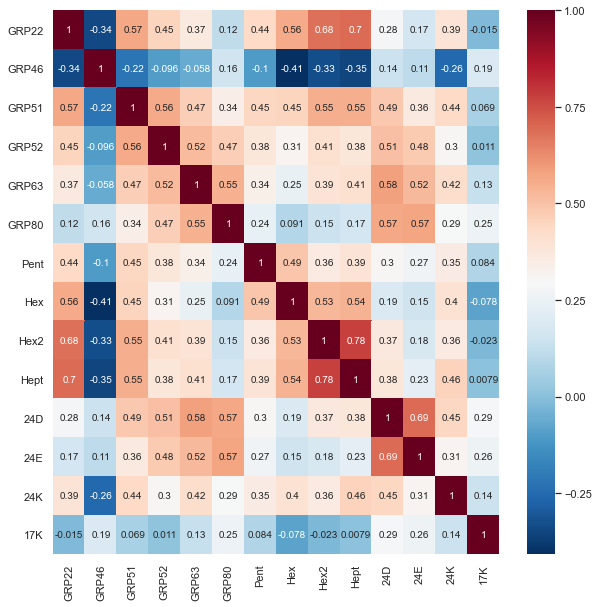

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
GRP22,1.000000,-0.339616,0.570942,0.450840,0.365467,0.119046,0.438622,0.562124,0.684976,0.697170,0.282982,0.168456,0.393128,-0.015334
GRP46,-0.339616,1.000000,-0.216615,-0.095795,-0.057578,0.156771,-0.104653,-0.407543,-0.325744,-0.352284,0.142490,0.111613,-0.256109,0.188267
GRP51,0.570942,-0.216615,1.000000,0.564302,0.468326,0.341901,0.448118,0.453116,0.551137,0.549549,0.487789,0.364492,0.435988,0.068756
GRP52,0.450840,-0.095795,0.564302,1.000000,0.516865,0.469232,0.379412,0.313885,0.407441,0.381102,0.507599,0.478449,0.302357,0.010784
GRP63,0.365467,-0.057578,0.468326,0.516865,1.000000,0.545029,0.336970,0.245386,0.393685,0.409262,0.582296,0.522275,0.422242,0.133025
GRP80,0.119046,0.156771,0.341901,0.469232,0.545029,1.000000,0.240276,0.090954,0.146879,0.169104,0.569222,0.574044,0.294480,0.253318
Pent,0.438622,-0.104653,0.448118,0.379412,0.336970,0.240276,1.000000,0.489213,0.361458,0.390543,0.303356,0.266645,0.353501,0.083752
Hex,0.562124,-0.407543,0.453116,0.313885,0.245386,0.090954,0.489213,1.000000,0.527992,0.541729,0.190990,0.152788,0.402011,-0.078187
Hex2,0.684976,-0.325744,0.551137,0.407441,0.393685,0.146879,0.361458,0.527992,1.000000,0.779227,0.371187,0.179490,0.356886,-0.022657
Hept,0.697170,-0.352284,0.549549,0.381102,0.409262,0.169104,0.390543,0.541729,0.779227,1.000000,0.381007,0.226852,0.458512,0.007917


In [31]:
ml.calc_feature_correlations(train_data=ml.fluor_data)

- Measure the relative importances of the initial 14 features

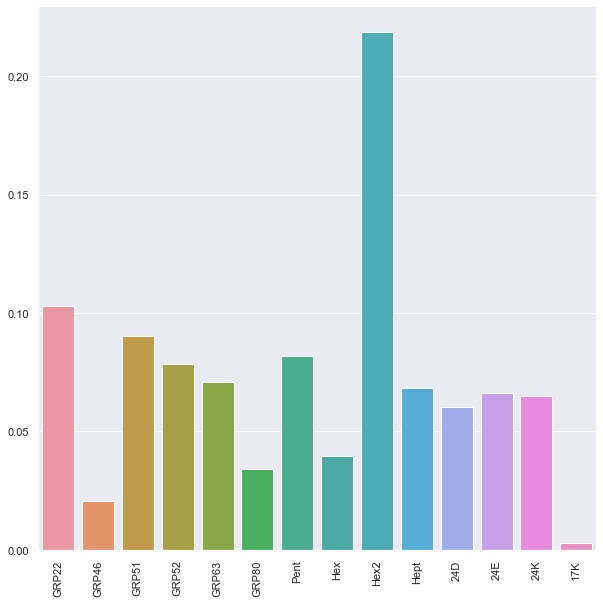

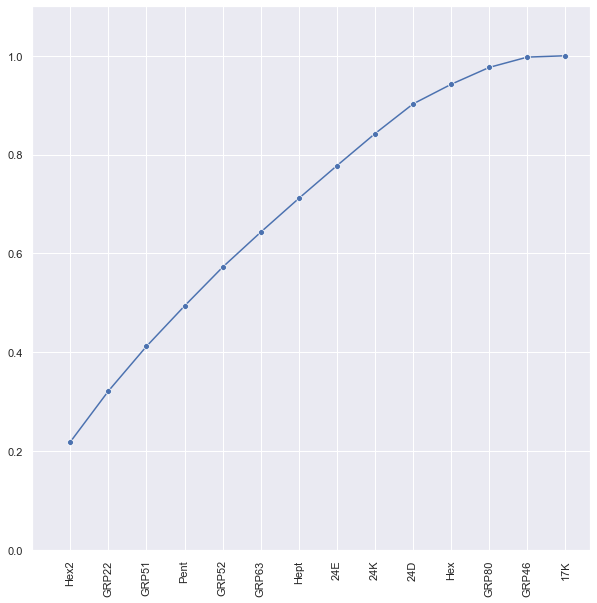

,Feature,Score
0,Hex2,0.218513
1,GRP22,0.102954
2,GRP51,0.090470
3,Pent,0.081796
4,GRP52,0.078479
5,GRP63,0.070780
6,Hept,0.068344
7,24E,0.066206
8,24K,0.064850
9,24D,0.060166


In [32]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- Run PCA to determine the number of components to use in all following cross-validation splits

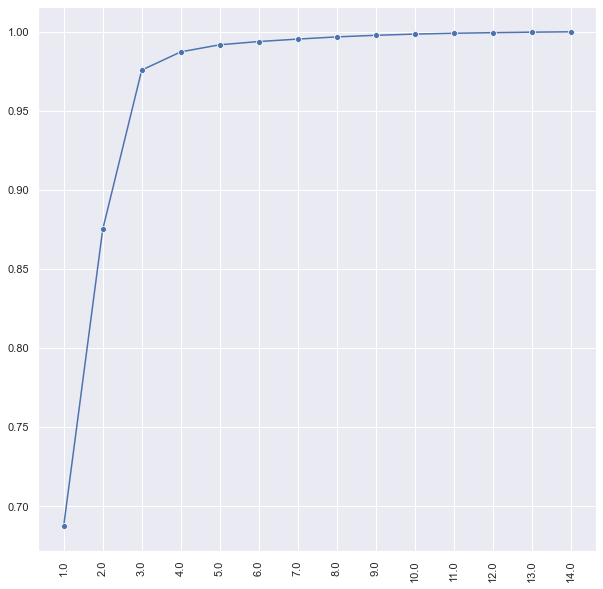

In [33]:
all_features_pca = ml.run_pca(x_train=ml.x, features=ml.features)

Contributions of the 14 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [34]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 15)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [35]:
pca_components

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
Component,,,,,,,,,,,,,,
1,-0.123069,0.923322,-0.102786,-0.124125,-0.123923,-0.054306,-0.110436,-0.113105,-0.121146,-0.086681,-0.109479,-0.112705,-0.117567,-0.048621
2,-0.002050,0.086699,0.023419,0.025384,0.031795,0.034565,0.039452,0.054653,-0.005548,-0.001496,0.040677,0.039709,0.017922,0.990430
3,0.284392,0.369587,0.274458,0.279972,0.281706,0.263095,0.248007,0.226470,0.274692,0.192118,0.282035,0.272150,0.298165,-0.112091
4,-0.191152,-0.030089,0.059857,0.177051,0.251420,0.258504,0.082498,-0.506905,-0.552466,-0.325256,0.209672,0.242415,0.140247,-0.020577
5,-0.055011,0.005540,-0.099240,-0.002849,0.005326,-0.000546,0.108604,0.789936,-0.533214,-0.244577,0.004348,0.003607,0.066946,-0.051138
6,-0.070646,-0.010807,0.072622,-0.232338,-0.058280,0.084657,-0.373380,-0.011193,-0.368214,0.687848,0.176171,-0.110675,0.365313,0.009012
7,-0.231009,-0.001352,-0.092407,-0.192323,0.393776,-0.028406,-0.247846,0.048926,0.308087,-0.371066,-0.007559,-0.334799,0.580187,0.006677
8,0.409181,0.038618,0.169736,0.093796,0.098076,-0.785717,0.122464,-0.149357,-0.227007,-0.023417,-0.074782,-0.036415,0.264394,0.017124
9,-0.155501,0.012677,-0.162972,-0.015789,-0.113559,-0.365385,-0.349593,0.085288,0.153102,-0.124890,0.682917,0.392286,-0.116187,-0.012561


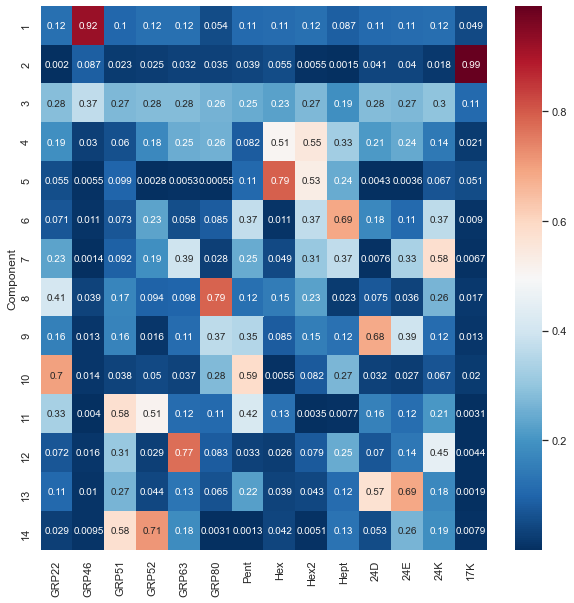

In [36]:
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Relative contribution to the different components of each barrel

In [37]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components.abs()).div(col_sums, axis=1)

In [38]:
relative_pca_components

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
Component,,,,,,,,,,,,,,
1,0.044604,0.602588,0.036422,0.049838,0.047694,0.022484,0.037533,0.050839,0.043957,0.030676,0.044260,0.040604,0.038420,0.037235
2,0.000743,0.056582,0.008298,0.010192,0.012237,0.014311,0.013409,0.024566,0.002013,0.000530,0.016445,0.014306,0.005857,0.758485
3,0.103073,0.241204,0.097253,0.112412,0.108421,0.108929,0.084289,0.101795,0.099671,0.067991,0.114021,0.098046,0.097438,0.085841
4,0.069280,0.019637,0.021210,0.071088,0.096764,0.107029,0.028038,0.227847,0.200461,0.115109,0.084766,0.087334,0.045832,0.015758
5,0.019938,0.003616,0.035165,0.001144,0.002050,0.000226,0.036911,0.355065,0.193476,0.086556,0.001758,0.001299,0.021878,0.039162
6,0.025604,0.007053,0.025733,0.093286,0.022430,0.035051,0.126899,0.005031,0.133606,0.243430,0.071223,0.039872,0.119382,0.006902
7,0.083725,0.000883,0.032744,0.077220,0.151553,0.011761,0.084234,0.021992,0.111789,0.131321,0.003056,0.120616,0.189602,0.005114
8,0.148301,0.025203,0.060145,0.037660,0.037747,0.325310,0.041621,0.067134,0.082369,0.008287,0.030233,0.013119,0.086402,0.013114
9,0.056359,0.008273,0.057748,0.006339,0.043705,0.151280,0.118814,0.038336,0.055553,0.044199,0.276090,0.141327,0.037969,0.009619


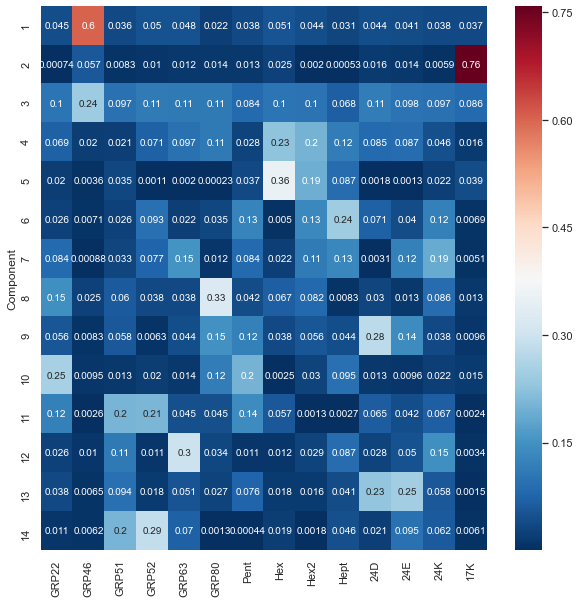

In [39]:
sns.heatmap(data=relative_pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Scatter plots of data transformed to PCA dimensions

In [40]:
def plot_3D_scatter(x_data, y_data, categories, results_dir, plot_id):
    """
    """
    
    from matplotlib.colors import BASE_COLORS, CSS4_COLORS
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch
    import random

    colours = [key for key, val in BASE_COLORS.items()]
    extra_colours = [key for key, val in CSS4_COLORS.items()]
    random.shuffle(extra_colours)
    colours += extra_colours
    cat_colours = {}
    for index, cat in enumerate(categories):
        cat_colours[cat] = colours[index]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x_data[:,0], x_data[:,1], x_data[:,2], c=[cat_colours[y] for y in y_data])

    legend_elements = []
    for cat, colour in cat_colours.items():
        legend_elements.append(Line2D([0], [0], marker='o', color=colour, label=cat, markerfacecolor=colour))
    ax.legend(handles=legend_elements, loc='upper right', title='Classes')

    plt.savefig('{}/{}_3d_PCA_plot.svg'.format(results_dir, plot_id))
    plt.show()

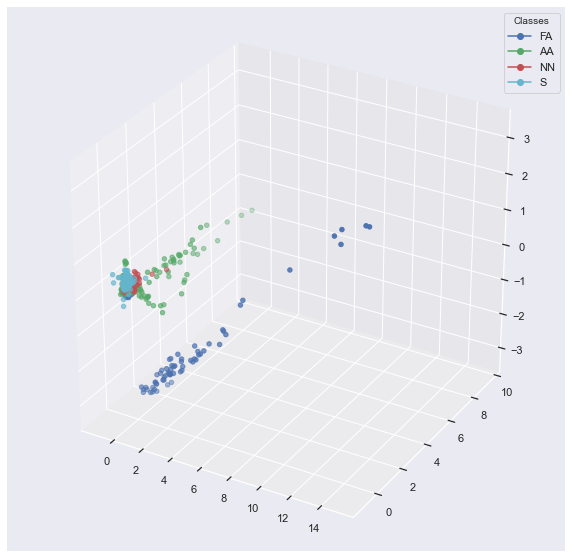

In [41]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_3D_scatter(
    x_data=X_reduced, y_data=ml.y, categories=['FA', 'AA', 'NN', 'S'], results_dir=ml.results_dir,
    plot_id='All_data'
)

~98% of the variation in the data can be accounted for with 4 features, so will transform the data to 4 (rather than 14) dimensions

In [42]:
n_components = 4

Runs randomized search to spot check 6 different ML algorithms with 25 different combinations of the parameters to be optimised, in combination with 6 different methods of dealing with imbalanced classes. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- transformation from 14 to 4 dimensions using PCA
- resampling the data
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [43]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing', 'max_sampling', 'smote', 'adasyn', 'smoteenn', 'smotetomek']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_f1_score': [],
                          'Mean_f1_score': [],
                          'Std_dev_f1_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
random_forest = RandomForestClassifier(n_jobs=-1)
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc, random_forest]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)  # Actual number of x samples will be
    # different owing to oversampling, but don't want to hard code this selection into the pipeline, so for now
    # this estimate will do
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='f1_macro', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_f1_score'].append(spot_check.best_score_)
        score_dict['Mean_f1_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_f1_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 10000.0}
Best score: 0.5620525370816747
Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 31622.776601683792}
Best score: 0.6636898296652337
Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 31.622776601683793}
Best score: 0.6524154785315329
Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'Log

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 100.0}
Best score: 0.6454407905722906






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 10000.0}
Best score: 0.5620525370816747
All parameter combinations tested:
1 {'LogisticRegression__solver': 'liblinear', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.31622776601683794} 0.507
2 {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 3.1622776601683795} 0.561
3 {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_cl

Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'distance', 'KNeighborsClassifier__p': 1, 'KNeighborsClassifier__n_neighbors': 11}
Best score: 0.668715957961748
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'distance', 'KNeighborsClassifier__p': 1, 'KNeighborsClassifier__n_neighbors': 22}
Best score: 0.6790024564064971
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'distance', 'KNeighborsClassifier__p': 1, 'KNeighborsClassifier__n_neighbors': 12}
Best score: 0.6865417457410631
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'distance', 'KNeighborsClassifier__p': 1, 'KNeighborsClassifier__n_neighbors': 10}
Best score: 0.6805303691441984
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'uniform', 'KNeighborsClassifier__p': 2, 'KNe

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=25. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=25. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=25. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Randomised search with cross-validation results:
Best parameters: {}
Best score: 0.45513726948245237
Randomised search with cross-validation results:
Best parameters: {}
Best score: 0.46858998839622945
Randomised search with cross-validation results:
Best parameters: {}
Best score: 0.47228537314313995


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=25. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=25. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Randomised search with cross-validation results:
Best parameters: {}
Best score: 0.4959994916415879
Randomised search with cross-validation results:
Best parameters: {}
Best score: 0.47902839263149166


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=25. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Randomised search with cross-validation results:
Best parameters: {}
Best score: 0.4685164605126281






GaussianNB: no_balancing
Best parameters: {}
Best score: 0.45513726948245237
All parameter combinations tested:
1 {} 0.455






GaussianNB: max_sampling
Best parameters: {}
Best score: 0.46858998839622945
All parameter combinations tested:
1 {} 0.469






GaussianNB: smote
Best parameters: {}
Best score: 0.47228537314313995
All parameter combinations tested:
1 {} 0.472






GaussianNB: adasyn
Best parameters: {}
Best score: 0.4959994916415879
All parameter combinations tested:
1 {} 0.496






GaussianNB: smoteenn
Best parameters: {}
Best score: 0.47902839263149166
All parameter combinations tested:
1 {} 0.479






GaussianNB: smotetomek
Best parameters: {}
Best score: 0.4685164605126281
All parameter combinations tested:
1 {} 0.469
Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 128.0}
Best score: 0.5320813300675664
Randomised search with cro

Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 4.0, 'SVC__C': 2.8284271247461903}
Best score: 0.7033363706333572
Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.5, 'SVC__C': 45.254833995939045}
Best score: 0.7197449342167423
Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.1767766952966369, 'SVC__C': 4096.0}
Best score: 0.7240827019236603
Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.04419417382415922, 'SVC__C': 90.50966799187809}
Best score: 0.710513812110741
Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.5, 'SVC__C': 90.50966799187809}
Best score: 0.6813168640128359
Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.0625, 'SVC__C': 22.627416997969522}
Best score: 0.7008335208178504






SVC: no_balancing
Best parameters: {'SVC__gamma': 4.0, 'SVC__C': 2.8284271247461903}
Best sco

Randomised search with cross-validation results:
Best parameters: {'RandomForestClassifier__n_estimators': 10, 'RandomForestClassifier__min_samples_split': 10, 'RandomForestClassifier__min_samples_leaf': 2}
Best score: 0.6670309805863419
Range tested: [10, 31, 100, 316, 1000, 3162, 10000]
Value selected: 10
Randomised search with cross-validation results:
Best parameters: {'RandomForestClassifier__n_estimators': 100, 'RandomForestClassifier__min_samples_split': 25, 'RandomForestClassifier__min_samples_leaf': 2}
Best score: 0.695693950791866
Randomised search with cross-validation results:
Best parameters: {'RandomForestClassifier__n_estimators': 31, 'RandomForestClassifier__min_samples_split': 20, 'RandomForestClassifier__min_samples_leaf': 12}
Best score: 0.6742521517287596


/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Randomised search with cross-validation results:
Best parameters: {'RandomForestClassifier__n_estimators': 100, 'RandomForestClassifier__min_samples_split': 15, 'RandomForestClassifier__min_samples_leaf': 2}
Best score: 0.698967007772872
Randomised search with cross-validation results:
Best parameters: {'RandomForestClassifier__n_estimators': 316, 'RandomForestClassifier__min_samples_split': 7, 'RandomForestClassifier__min_samples_leaf': 5}
Best score: 0.6619115183475053


/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Randomised search with cross-validation results:
Best parameters: {'RandomForestClassifier__n_estimators': 316, 'RandomForestClassifier__min_samples_split': 21, 'RandomForestClassifier__min_samples_leaf': 3}
Best score: 0.6700617804926416






RandomForestClassifier: no_balancing
Best parameters: {'RandomForestClassifier__n_estimators': 10, 'RandomForestClassifier__min_samples_split': 10, 'RandomForestClassifier__min_samples_leaf': 2}
Best score: 0.6670309805863419
All parameter combinations tested:
1 {'RandomForestClassifier__n_estimators': 316, 'RandomForestClassifier__min_samples_split': 45, 'RandomForestClassifier__min_samples_leaf': 36} 0.523
2 {'RandomForestClassifier__n_estimators': 316, 'RandomForestClassifier__min_samples_split': 61, 'RandomForestClassifier__min_samples_leaf': 28} 0.542
3 {'RandomForestClassifier__n_estimators': 100, 'RandomForestClassifier__min_samples_split': 20, 'RandomForestClassifier__min_samples_leaf': 33} 0.538
4 {'RandomForestClassifier__n_estimators'

In [44]:
score_df

,Algorithm,Resampling_method,Best_params,Best_f1_score,Mean_f1_score,Std_dev_f1_score
0,LogisticRegression,no_balancing,"{'LogisticRegression__solver': 'saga', 'Logist...",0.562053,0.500494,0.016738
1,LogisticRegression,max_sampling,"{'LogisticRegression__solver': 'newton-cg', 'L...",0.663690,0.597206,0.029919
2,LogisticRegression,smote,"{'LogisticRegression__solver': 'lbfgs', 'Logis...",0.652415,0.580435,0.033429
3,LogisticRegression,adasyn,"{'LogisticRegression__solver': 'newton-cg', 'L...",0.652256,0.605281,0.017353
4,LogisticRegression,smoteenn,"{'LogisticRegression__solver': 'lbfgs', 'Logis...",0.617540,0.497228,0.028072
5,LogisticRegression,smotetomek,"{'LogisticRegression__solver': 'saga', 'Logist...",0.645441,0.578422,0.031890
6,KNeighborsClassifier,no_balancing,"{'KNeighborsClassifier__weights': 'distance', ...",0.668716,0.572592,0.028093
7,KNeighborsClassifier,max_sampling,"{'KNeighborsClassifier__weights': 'distance', ...",0.679002,0.648671,0.028030
8,KNeighborsClassifier,smote,"{'KNeighborsClassifier__weights': 'distance', ...",0.686542,0.635886,0.027225
9,KNeighborsClassifier,adasyn,"{'KNeighborsClassifier__weights': 'distance', ...",0.680530,0.624857,0.039949


So, from this spot check, **support vector classifier with radial basis function  kernel**, with class rebalancing using **smote** does a good job.

So, run hyperparameter optimisation for SVC.

In [45]:
fixed_params = ml.define_fixed_model_params(clf=SVC())
random_tuned_params = ml.define_tuned_model_params(clf=SVC(), x_train=ml.train_x)  # Actual number of x samples
# will be different owing to oversampling, but don't want to hard code this selection into the pipeline, so for
# now this estimate will do to define the ranges of values to test for some of the hyperparameter values

svc_random_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x, y_test=ml.test_y,
    n_components_pca=4, run='random search', fixed_params=fixed_params, tuned_params=random_tuned_params,
    train_scoring_func='f1_macro', test_scoring_funcs=None, resampling_method=['smote'], n_iter='',
    cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.25, 'SVC__C': 4096.0}
Best score: 0.7152607582735533


In [47]:
grid_tuned_params = {'gamma': np.linspace(0.05, 2, 40),
                     'C': np.linspace(200, 10000, 50)}

svc_grid_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x, y_test=ml.test_y,
    n_components_pca=4, run='grid search', fixed_params=fixed_params, tuned_params=grid_tuned_params,
    train_scoring_func='f1_macro', test_scoring_funcs=None, resampling_method=['smote'], n_iter='',
    cv_folds=cv_folds
)

Grid search with cross-validation results:
Best parameters: {'SVC__C': 600.0, 'SVC__gamma': 0.7}
Best score: 0.7300501671287523


### So, optimal hyperparameter combination:
- C = 600
- gamma = 0.7

Model cross-validation score: [0.681223   0.68405042 0.66574361 0.69763403 0.75426267]
accuracy_score: 0.7237569060773481
recall_score: 0.7645606390704429
precision_score: 0.7372023809523809
f1_score: 0.7426970824453034
cohen_kappa_score: 0.606863596872285


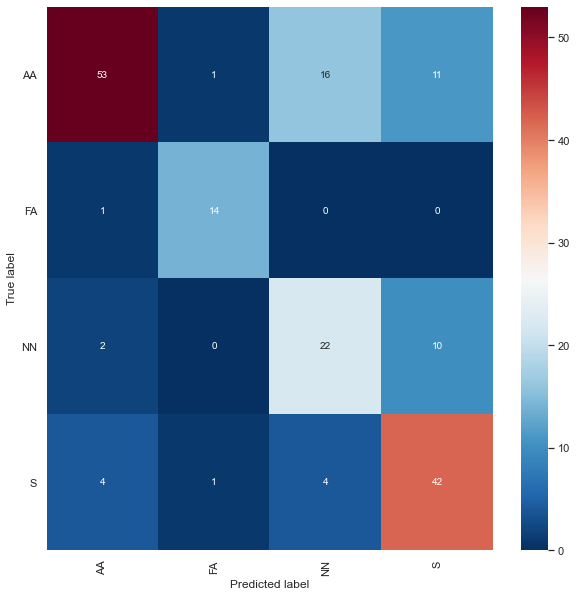

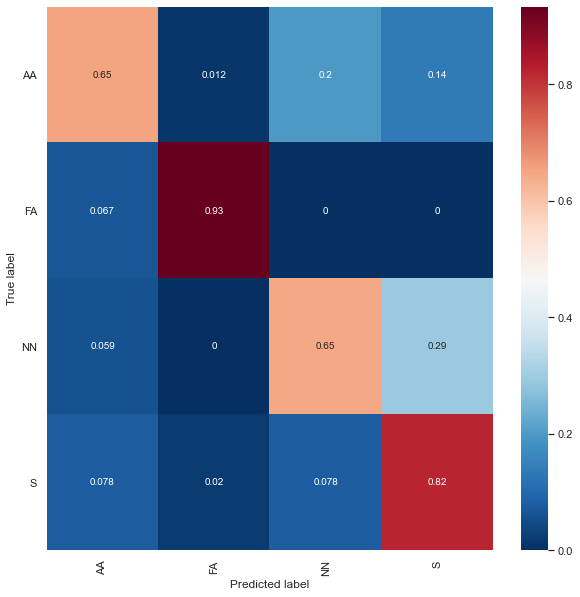

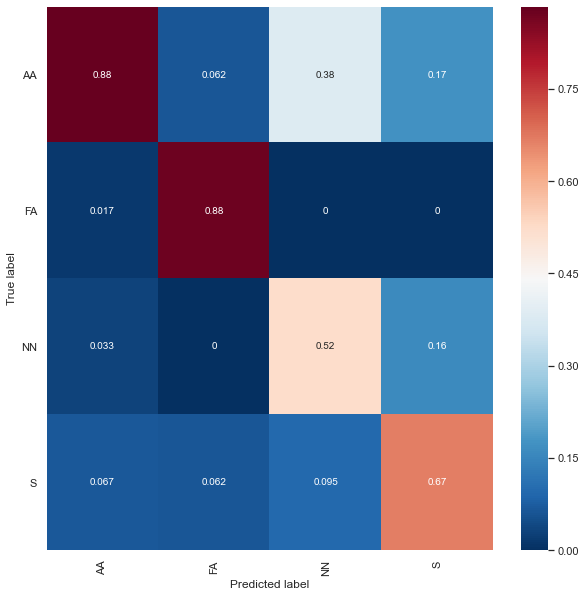

In [48]:
final_params = {'C': 600,
                'gamma': 0.7}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

svc_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x, y_test=ml.test_y,
    n_components_pca=4, run='train', fixed_params=fixed_params, tuned_params=final_params,
    train_scoring_func='f1_macro', test_scoring_funcs=scoring_funcs, resampling_method=['smote'],
    n_iter=n_iter, cv_folds=cv_folds
)

How well does the trained classifier predict the different classes?

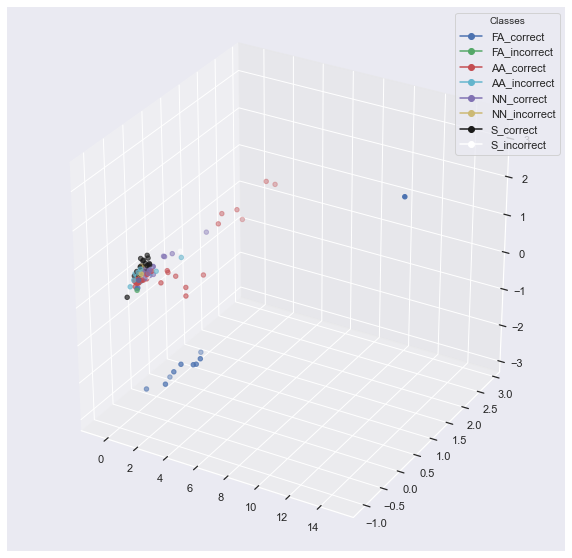

In [50]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 3D scatter plot
x_train_pca = plot_3D_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue,
    categories=['FA_correct', 'FA_incorrect', 'AA_correct', 'AA_incorrect', 'NN_correct', 'NN_incorrect',
                'S_correct', 'S_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)